In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import tree

In [5]:
df = pd.read_csv("../input/cancer.csv")

In [6]:
df.drop(columns = ["id","Unnamed: 32"],inplace = True)

In [7]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
dfben = df.loc[df.diagnosis == "B",:]
dfmal = df.loc[df.diagnosis == "M",:]

In [9]:
dfbensample = dfben.sample(n=212,random_state=42)

In [10]:
df = pd.concat([dfbensample,dfmal])

In [11]:
x = df.iloc[:,1:]
y = df["diagnosis"]

In [12]:
x_meana = x.iloc[:,20:30]

In [13]:
x_meana

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...
563,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
564,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [14]:
x_meana.drop(columns=["perimeter_worst","area_worst","concave points_worst"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_2060\2003305055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_meana.drop(columns=["perimeter_worst","area_worst","concave points_worst"],inplace = True)


In [15]:
X_traina, X_testa, y_traina, y_testa = train_test_split(
    x_meana, y, test_size=0.3, random_state=42,stratify = y)

In [16]:
clfa = DecisionTreeClassifier(criterion='entropy')

In [17]:
clfa.fit(X_traina,y_traina)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_preda = clfa.predict(X_testa)

In [19]:
matriza = confusion_matrix(y_testa, y_preda)

In [20]:
clfa = RandomForestClassifier(random_state=0)

In [21]:
clfa.fit(X_traina,y_traina)

RandomForestClassifier(random_state=0)

<Axes: >

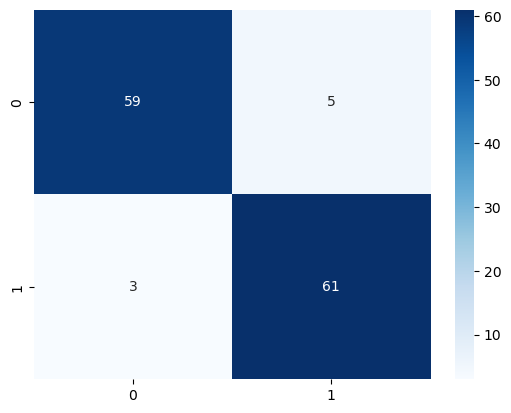

In [22]:
sns.heatmap(data = matriza, annot = True, cmap = 'Blues')

In [23]:
accuracya = accuracy_score(y_testa, y_preda) 

In [24]:
accuracya 

0.9375

In [25]:
recalla = recall_score(y_testa, y_preda, average='weighted')

In [26]:
recalla 

0.9375

In [27]:
precisiona = precision_score(y_testa, y_preda, average='weighted')

In [28]:
precisiona 

0.9379276637341154

In [29]:
x_meanb = x.iloc[:,10:30]

In [30]:
x_meanb

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,0.1504,1.6850,1.237,12.67,0.005371,0.01273,0.011320,0.009155,0.01719,0.001444,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.027220,0.010230,0.03281,0.004638,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.015300,0.006275,0.01062,0.002217,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,0.3276,1.4860,2.108,24.60,0.010390,0.01003,0.006416,0.007895,0.02869,0.004821,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.026620,0.013070,0.01359,0.003707,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.024540,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.047300,0.015570,0.01318,0.003892,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [31]:
x_meanb.drop(columns=["perimeter_worst","area_worst","concave points_worst","perimeter_se","area_se","concave points_se"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_2060\1945685445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_meanb.drop(columns=["perimeter_worst","area_worst","concave points_worst","perimeter_se","area_se","concave points_se"],inplace = True)


In [32]:
X_trainb, X_testb, y_trainb, y_testb = train_test_split(
    x_meanb, y, test_size=0.3, random_state=42,stratify = y)

In [33]:
clfb = DecisionTreeClassifier(criterion='entropy')

In [34]:
clfb.fit(X_trainb,y_trainb)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_predb = clfb.predict(X_testb)

In [36]:
matrizb = confusion_matrix(y_testb, y_predb)

In [37]:
clfb = RandomForestClassifier(random_state=0)

In [38]:
clfb.fit(X_trainb,y_trainb)

RandomForestClassifier(random_state=0)

<Axes: >

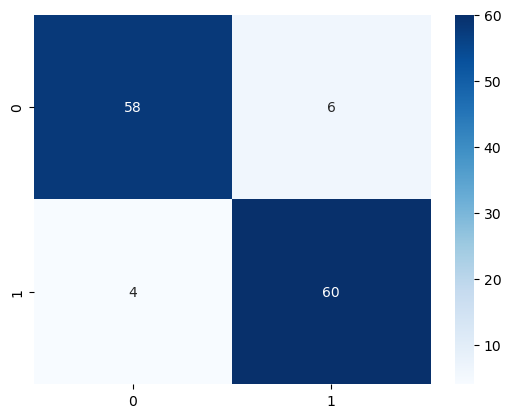

In [39]:
sns.heatmap(data = matrizb, annot = True, cmap = 'Blues')

In [40]:
accuracyb = accuracy_score(y_testb, y_predb) 

In [41]:
accuracyb 

0.921875

In [42]:
recallb = recall_score(y_testb, y_predb, average='weighted')

In [43]:
recallb

0.921875

In [44]:
precisionb = precision_score(y_testb, y_predb, average='weighted')

In [45]:
precisionb 

0.9222873900293255

In [46]:
x_meanc = x.iloc[:,:20]

In [47]:
x_meanc

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,0.1504,1.6850,1.237,12.67,0.005371,0.01273,0.011320,0.009155,0.01719,0.001444
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.027220,0.010230,0.03281,0.004638
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.015300,0.006275,0.01062,0.002217
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,0.3276,1.4860,2.108,24.60,0.010390,0.01003,0.006416,0.007895,0.02869,0.004821
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.026620,0.013070,0.01359,0.003707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.024540,0.01114,0.004239
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498
566,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.047300,0.015570,0.01318,0.003892


In [48]:
x_meanc.drop(columns=["perimeter_mean","area_mean","concave points_mean","perimeter_se","area_se","concave points_se"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_2060\1402301170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_meanc.drop(columns=["perimeter_mean","area_mean","concave points_mean","perimeter_se","area_se","concave points_se"],inplace = True)


In [49]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(
    x_meanc, y, test_size=0.3, random_state=42,stratify = y)

In [50]:
clfc = DecisionTreeClassifier(criterion='entropy')

In [51]:
clfc.fit(X_trainc,y_trainc)

DecisionTreeClassifier(criterion='entropy')

In [52]:
y_predc = clfc.predict(X_testc)

In [53]:
matrizc = confusion_matrix(y_testc, y_predc)

In [54]:
clfc = RandomForestClassifier(random_state=0)

In [55]:
clfc.fit(X_trainc,y_trainc)

RandomForestClassifier(random_state=0)

<Axes: >

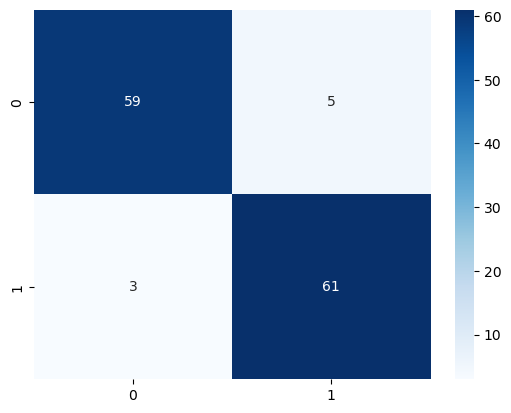

In [56]:
sns.heatmap(data = matrizc, annot = True, cmap = 'Blues')

In [57]:
accuracyc = accuracy_score(y_testc, y_predc) 

In [58]:
accuracyc

0.9375

In [59]:
recallc = recall_score(y_testc, y_predc, average='weighted')

In [60]:
recallc

0.9375

In [61]:
precisionc = precision_score(y_testc, y_predc, average='weighted')

In [62]:
precisionc

0.9379276637341154

In [63]:
# El modelo generado unicamente con worst de el dataframe "x_meana" es el que muestra los mejores valores tanto 
# en accuracy, recall y precision, lo que nos lleva a concluir que este es el mejor modelo de los 3